In [1]:
import tensorflow as tf
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

2023-04-06 02:03:02.833872: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 02:03:03.958061: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aaditya/catkin_ws/devel/lib:/home/aaditya/intruder_ws/devel/lib:/opt/ros/noetic/lib
2023-04-06 02:03:03.958135: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aaditya/catkin_ws/devel/lib:/home/

In [2]:
drown_training = "Overwater_Drowning/train"
training_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True, rotation_range=30, height_shift_range=0.2, fill_mode='nearest')

drown_validation = "Overwater_Drowning/valid"
validation_datagen = ImageDataGenerator(rescale = 1./255)

drown_train_generator = training_datagen.flow_from_directory(drown_training,target_size=(224,224),class_mode='categorical',batch_size = 64)

drown_validation_generator = validation_datagen.flow_from_directory(drown_validation, target_size=(224,224), class_mode='categorical', batch_size= 16)

Found 6569 images belonging to 2 classes.
Found 279 images belonging to 2 classes.


In [3]:
model_drown = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)), tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2, activation='softmax')])
model_drown.compile(loss='categorical_crossentropy',
optimizer=Adam(lr=0.0001),
metrics=['acc'])
history = model_drown.fit(drown_train_generator,steps_per_epoch = 15,epochs = 50,validation_data = drown_validation_generator,validation_steps = 15)

2023-04-06 02:03:05.260112: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-06 02:03:05.339888: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-06 02:03:05.340466: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-06 02:03:05.341800: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

Epoch 1/50


2023-04-06 02:03:09.578888: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8800
2023-04-06 02:03:10.451056: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-04-06 02:03:10.841820: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7ff4a400e080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-06 02:03:10.841875: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2023-04-06 02:03:10.856082: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER

 1/15 [=>............................] - ETA: 1:23 - loss: 0.7099 - acc: 0.2656

2023-04-06 02:03:12.783827: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-04-06 02:03:12.892634: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


15/15 [==============================] - 16s 714ms/step - loss: 0.8433 - acc: 0.7042 - val_loss: 0.6274 - val_acc: 0.7375
Epoch 2/50
15/15 [==============================] - 11s 760ms/step - loss: 0.6015 - acc: 0.7208 - val_loss: 0.5988 - val_acc: 0.7333
Epoch 3/50
15/15 [==============================] - 11s 718ms/step - loss: 0.5418 - acc: 0.7503 - val_loss: 0.6452 - val_acc: 0.7167
Epoch 4/50
15/15 [==============================] - 11s 723ms/step - loss: 0.5223 - acc: 0.7490 - val_loss: 0.5944 - val_acc: 0.7375
Epoch 5/50
15/15 [==============================] - 11s 727ms/step - loss: 0.5208 - acc: 0.7750 - val_loss: 0.5319 - val_acc: 0.7375
Epoch 6/50
15/15 [==============================] - 11s 734ms/step - loss: 0.5359 - acc: 0.7354 - val_loss: 0.4812 - val_acc: 0.7333
Epoch 7/50
15/15 [==============================] - 11s 726ms/step - loss: 0.4949 - acc: 0.7323 - val_loss: 0.3883 - val_acc: 0.7417
Epoch 8/50
15/15 [==============================] - 11s 726ms/step - loss: 0.447

In [4]:
model_drown.save('drowning_detection1.h5')

In [5]:
def detect(str,flag):
    if(flag == True):
        return "Detected " + str
    
    else:
        return "Didn't detect " + str

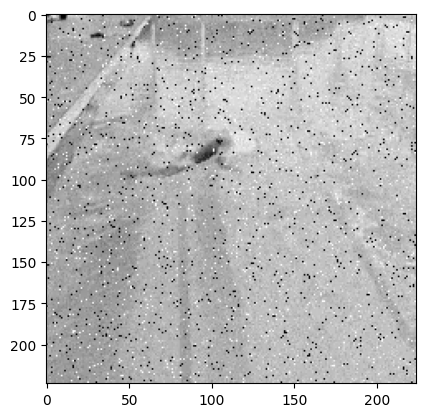

1/1 [==============================] - 0s 179ms/step
Didn't detect Drowning


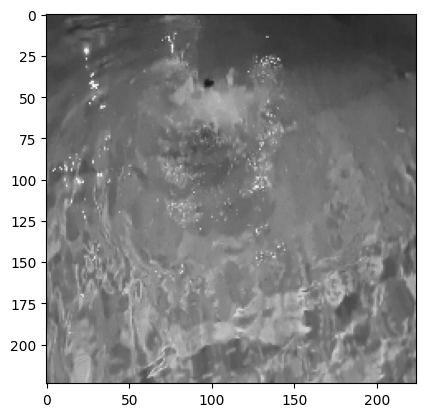

1/1 [==============================] - 0s 20ms/step
Detected Drowning


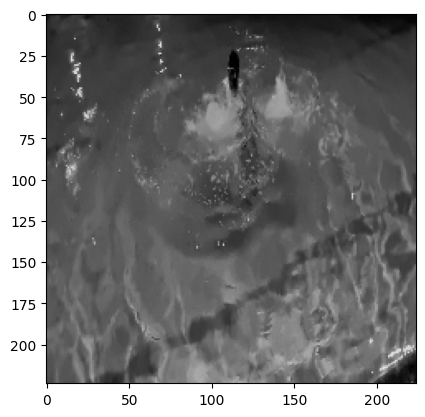

1/1 [==============================] - 0s 19ms/step
Detected Drowning


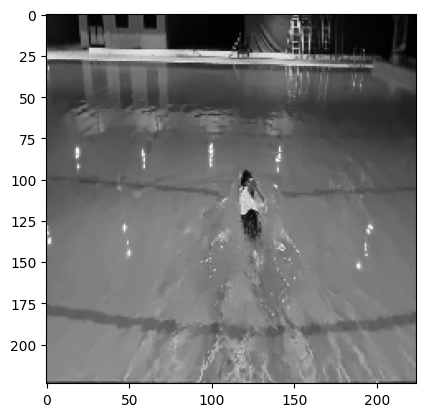

1/1 [==============================] - 0s 27ms/step
Didn't detect Drowning


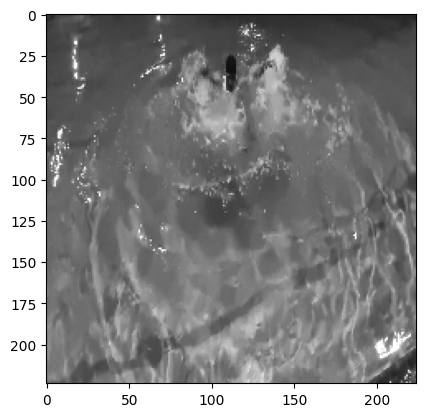

1/1 [==============================] - 0s 21ms/step
Detected Drowning


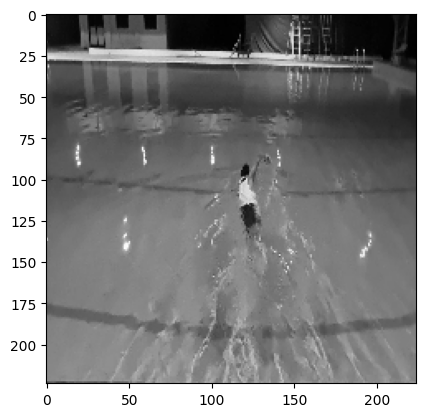

1/1 [==============================] - 0s 18ms/step
Didn't detect Drowning


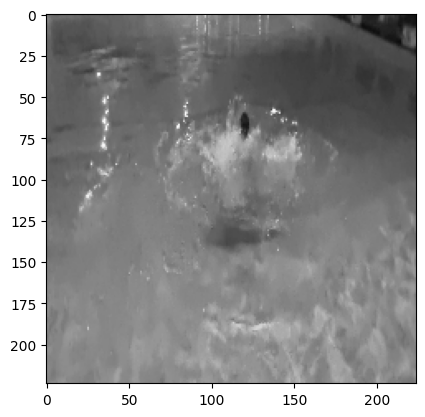

1/1 [==============================] - 0s 18ms/step
Detected Drowning


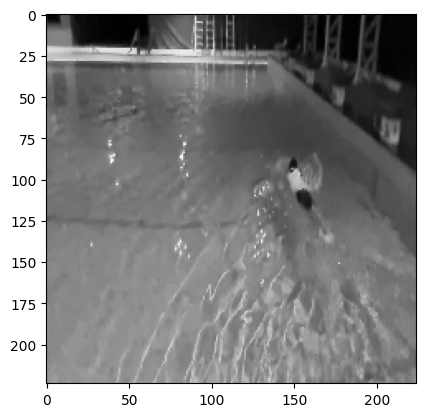

1/1 [==============================] - 0s 20ms/step
Didn't detect Drowning


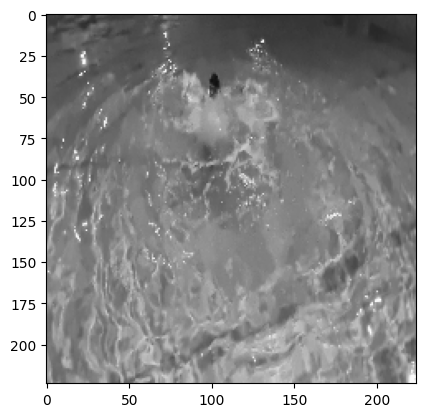

1/1 [==============================] - 0s 22ms/step
Detected Drowning


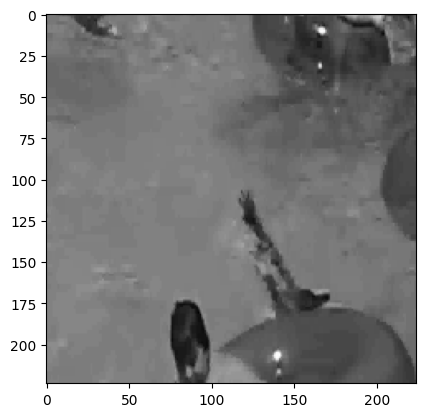

1/1 [==============================] - 0s 21ms/step
Detected Drowning


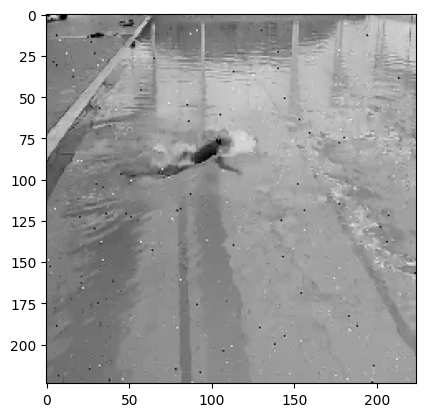

1/1 [==============================] - 0s 21ms/step
Didn't detect Drowning


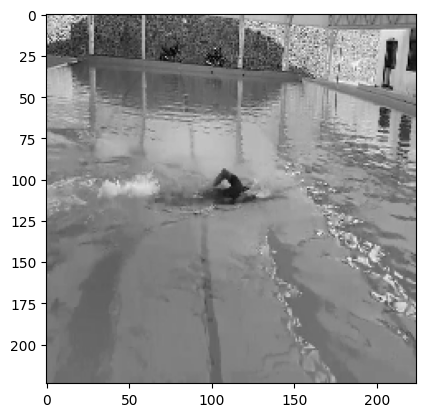

1/1 [==============================] - 0s 20ms/step
Didn't detect Drowning


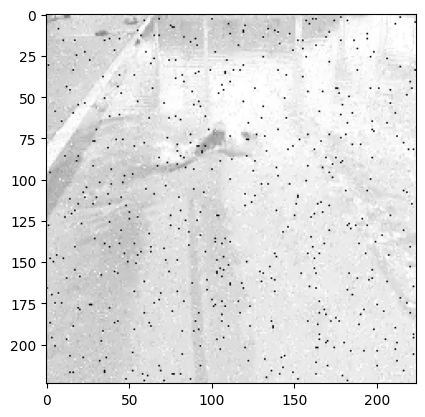

1/1 [==============================] - 0s 19ms/step
Didn't detect Drowning


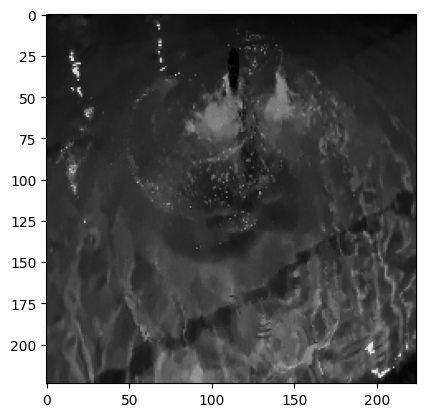

1/1 [==============================] - 0s 23ms/step
Detected Drowning


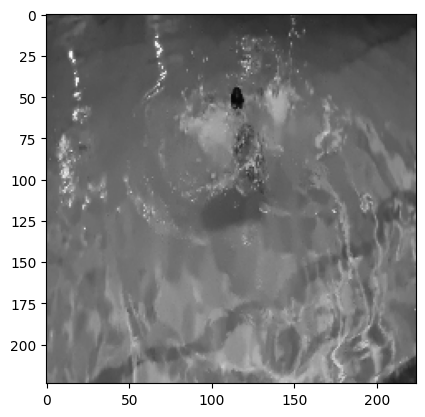

1/1 [==============================] - 0s 20ms/step
Detected Drowning


In [6]:
import numpy as np
import os
from matplotlib import pyplot as plt
path = 'Overwater_Drowning/test'
for i in os.listdir(path):
    img = image.load_img(path + '/' + i, target_size = (224,224))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255
    classes = model_drown.predict(x)
    fire_flag = detect("Drowning",np.argmax(classes[0]) == 0 )
    print(fire_flag)